### Code for example figures of approaches and contacts

In [1]:
import sys
# sys.path.append('../../')
import pandas as pd
from pathlib import Path
import os
import numpy as np
from os import listdir
from os.path import isfile, join,isdir
import matplotlib.pyplot  as plt
import cv2
import commons as cm
import mungling 

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from  scipy import stats 


In [2]:
behaviour_color={'exploration':'green','approach':'blue','contact':'red'}
figures_path='analysed/figures/'

# pd.set_option('display.max_rows', None)
# pd.reset_option("display.max_rows")

### Load the data

In [3]:
raw_matrix_df_aux=pd.read_excel('analysed/tables/raw_matrix_df_thr_0.1.xlsx')
# raw_matrix_df_aux=pd.read_csv('analysed/tables/approaches_end_contact_raw.csv')

# thr=raw_matrix_df_aux['behaviour_thr'].values[0]
thr_1=0.1# add other threhdolds for data analysis
thr_2=2000000000


#### Remove incomplete trials, group by day and add some columns in inamigary numbers for angle calculations

In [4]:

day=2

if day==2:
    toremove=['87'] 
raw_matrix_df=(raw_matrix_df_aux
               .query('day==@day')
               .query("mouse_num!=@toremove")
            )

## Ad columns of inmaginary numbers
raw_matrix_df['complex']=np.cos(raw_matrix_df['angle_head_cricket'])+  1j *np.sin(raw_matrix_df['angle_head_cricket'])
raw_matrix_df['angle_deg_from_complex']=np.angle(raw_matrix_df['complex'],deg=True)
raw_matrix_df['angle_rad_from_complex']=np.angle(raw_matrix_df['complex'],deg=False)



#### Add filtered speed and global column time to 0, and a final row with a contact just in case.

In [5]:
from scipy.signal import medfilt

for session in raw_matrix_df['session'].unique():
    index=raw_matrix_df['session']==session
    raw_matrix_df.loc[index,'speed_cm_s_med_filt']=medfilt(raw_matrix_df.loc[index,'speed_cm_s'],5)
    raw_matrix_df.loc[index,'session_time']=raw_matrix_df.loc[index,'time']-raw_matrix_df.loc[index,'time'].values[0]
   
   # add a final conctact row
    aux_row_index=raw_matrix_df.loc[index].index[-1]
    aux_row=raw_matrix_df.loc[index].iloc[-1]
    max_beh_counter=np.max(raw_matrix_df.loc[index,['beh_counter']])
    aux_row['beh_counter']=max_beh_counter+1
    aux_row['behaviour']='contact'
    raw_matrix_df.loc[aux_row_index]=aux_row

c:\Users\arturoV\AppData\Local\miniconda3\envs\analysis\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\arturoV\AppData\Local\miniconda3\envs\analysis\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\arturoV\AppData\Local\miniconda3\envs\analysis\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(ax

In [6]:
beh_aux=raw_matrix_df[['beh_counter','behaviour']].values
for index,beh_counter in enumerate(beh_aux):
    if    index==0:
        continue
    if  np.isnan(beh_counter[0]):
         beh_aux[index,0:2]=beh_aux[index-1,0:2]
raw_matrix_df['beh_counter']=beh_aux[:,0]
raw_matrix_df['behaviour']=beh_aux[:,1]


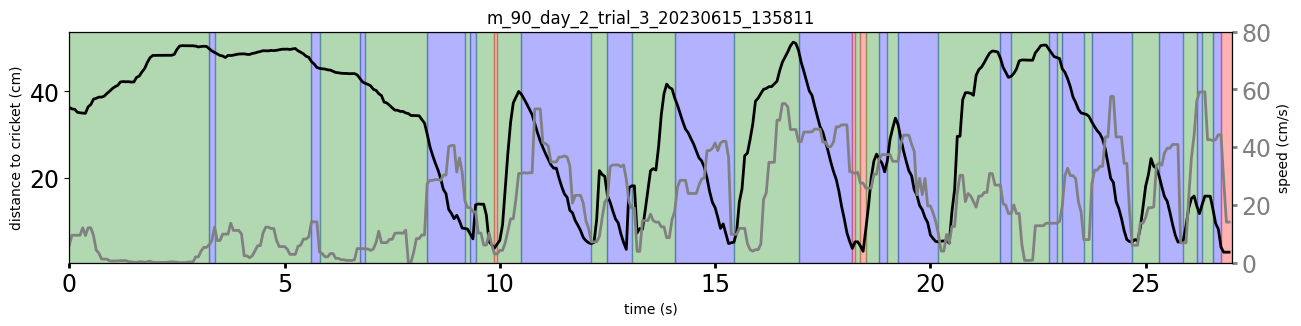

In [7]:
%matplotlib inline
behaviour_color={'exploration':'green','approach':'blue','contact':'red'}
herz=16
session='m_90_day_2_trial_3_20230615_135811'
data=raw_matrix_df.query("session==@session &\
                            behaviour.notnull()").reset_index()
linewidth=2
window_t=27
label_size=17

x=data['session_time']
x=np.arange(0,len(data),1)/herz

index_window=x<window_t
x=x[index_window]
data=data.loc[index_window]
y1=data['distance_head_cricket_cm']
y2=data['speed_cm_s_med_filt']

fig,ax=plt.subplots(1)
ax.plot(x,y1,'-',color='black',linewidth=linewidth)
ax2=ax.twinx()
ax2.plot(x,y2,'-',color='gray',linewidth=linewidth)

for beh in data['beh_counter'].unique():
    data_beh=data.query('beh_counter==@beh')
    x1=data_beh['beh_counter'].index[0] /herz
    x2=(data_beh['beh_counter'].index[-1]+1) /herz
    # x1=data_beh['session_time'].values[0]
    # x2=data_beh['session_time'].values[-1]

    tipo_beh=data_beh['behaviour'].unique()[0]
    ax.axvspan(x1, x2, color=behaviour_color[tipo_beh], alpha=0.3)
    ax.set_title(session)

ax.set_ylabel('distance to cricket (cm)')
ax2.set_ylabel('speed (cm/s)')
ax2.set_ylim(0,80)
ax2.set_ylim(0,80)
ax.set_xlabel('time (s)')
ax.margins(x=0)

ax.tick_params(axis='x', labelsize=label_size,direction='out',width=2)
ax.tick_params(axis='y', labelsize=label_size)
ax2.tick_params(axis='y', labelsize=label_size,direction='out',width=2,color='gray',colors='gray')
fig.set_figheight(3)
fig.set_figwidth(15)

fig.savefig(figures_path+'example_control.tiff', bbox_inches='tight', dpi=300, format='tiff')

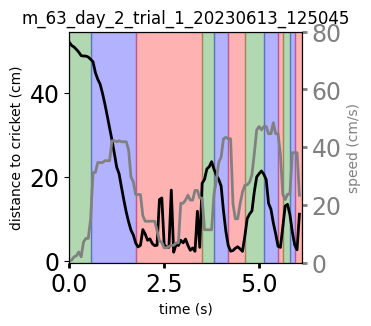

In [8]:
%matplotlib inline
behaviour_color={'exploration':'green','approach':'blue','contact':'red'}
herz=16
session='m_63_day_2_trial_1_20230613_125045'
data=raw_matrix_df.query("session==@session &\
                            behaviour.notnull()").reset_index()
linewidth=2
window_t=6.1
label_size=17

x=data['session_time']
x=np.arange(0,len(data),1)/herz

index_window=x<window_t
x=x[index_window]
data=data.loc[index_window]
y1=data['distance_head_cricket_cm']
y2=data['speed_cm_s_med_filt']

fig,ax=plt.subplots(1)
ax.plot(x,y1,'-',color='black',linewidth=linewidth)
ax2=ax.twinx()
ax2.plot(x,y2,'-',color='gray',linewidth=linewidth)

for beh in data['beh_counter'].unique():
    data_beh=data.query('beh_counter==@beh')
    x1=data_beh['beh_counter'].index[0] /herz
    x2=(data_beh['beh_counter'].index[-1]+1) /herz
    # x1=data_beh['session_time'].values[0]
    # x2=data_beh['session_time'].values[-1]

    tipo_beh=data_beh['behaviour'].unique()[0]
    ax.axvspan(x1, x2, color=behaviour_color[tipo_beh], alpha=0.3)
    ax.set_title(session)

ax.set_ylabel('distance to cricket (cm)')
ax2.set_ylabel('speed (cm/s)',color='gray')
ax2.set_ylim(0,80)
ax2.set_ylim(0,)
ax.set_xlabel('time (s)')
ax.margins(x=0)
ax.tick_params(axis='x', labelsize=label_size,direction='out',width=2)
ax.tick_params(axis='y', labelsize=label_size)
ax2.tick_params(axis='y', labelsize=label_size,direction='out',width=2,color='gray',colors='gray')


fig.set_figheight(3)
fig.set_figwidth(3)

fig.savefig(figures_path+'exmample_mutant.tiff', bbox_inches='tight', dpi=300, format='tiff')